<a href="https://colab.research.google.com/github/prunojumah/prunojumah/blob/master/Week4_IP_Pruno_Jumah_Python_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing libraries that will be need in the project

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pymc3 as pm
import scipy
import scipy.stats as stats
import seaborn as sns



Loading our dataset from the source

In [ ]:
#dataset url: [http://bit.ly/DSCoreAutolibDataset]
autolib = pd.read_csv('/content/autolib_daily_events_postal_code.csv')
autolib.head()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20


In [ ]:
#loading the second dataset from the source
from pandas import ExcelWriter
explanations = pd.read_excel('/content/columns_explanation.xlsx')
explanations

,Column name,explanation
0,Postal code,postal code of the area (in Paris)
1,date,date of the row aggregation
2,n_daily_data_points,number of daily data poinst that were availabl...
3,dayOfWeek,identifier of weekday (0: Monday -> 6: Sunday)
4,day_type,weekday or weekend
5,BlueCars_taken_sum,Number of bluecars taken that date in that area
6,BlueCars_returned_sum,Number of bluecars returned that date in that ...
7,Utilib_taken_sum,Number of Utilib taken that date in that area
8,Utilib_returned_sum,Number of Utilib returned that date in that area
9,Utilib_14_taken_sum,Number of Utilib 1.4 taken that date in that area


Checking and getting an overview of the dataset

In [ ]:
#Previewing the first 10 rows of the dataset

autolib.head(10)

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20
5,75001,1/6/2018,1437,5,weekend,187,185,6,6,7,8,38,35
6,75001,1/7/2018,1440,6,weekend,180,180,2,2,10,9,34,34
7,75001,1/8/2018,1438,0,weekday,84,83,3,3,10,10,14,15
8,75001,1/9/2018,1439,1,weekday,81,84,1,1,4,4,15,15
9,75001,1/10/2018,1440,2,weekday,88,85,5,5,11,11,23,22


In [ ]:
#Previewing and getting an overview of the bottom 10 of the dataset

autolib.tail(10)

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
16075,95880,6/10/2018,1440,6,weekend,34,32,0,0,1,0,0,0
16076,95880,6/11/2018,1440,0,weekday,17,18,0,0,0,0,0,0
16077,95880,6/12/2018,1439,1,weekday,25,25,0,0,0,0,0,0
16078,95880,6/13/2018,1440,2,weekday,12,13,0,0,1,1,0,0
16079,95880,6/14/2018,1439,3,weekday,15,13,0,0,0,0,0,0
16080,95880,6/15/2018,1440,4,weekday,15,10,0,0,2,3,0,0
16081,95880,6/16/2018,1440,5,weekend,19,19,0,0,2,1,0,0
16082,95880,6/17/2018,1440,6,weekend,33,35,1,1,0,0,0,0
16083,95880,6/18/2018,1440,0,weekday,11,14,3,5,2,2,0,0
16084,95880,6/19/2018,1370,1,weekday,2,2,2,1,0,0,0,0


In [ ]:
#Checking the shape of the autolib dataset

autolib.shape

(16085, 13)

In [ ]:
#Checking the column's datatypes

autolib.dtypes


Postal code                int64
date                      object
n_daily_data_points        int64
dayOfWeek                  int64
day_type                  object
BlueCars_taken_sum         int64
BlueCars_returned_sum      int64
Utilib_taken_sum           int64
Utilib_returned_sum        int64
Utilib_14_taken_sum        int64
Utilib_14_returned_sum     int64
Slots_freed_sum            int64
Slots_taken_sum            int64
dtype: object

In [ ]:
#Changing the date datatype from object to datetime

from datetime import date
from datetime import datetime

autolib['date'] = datetime.combine(date.today(), datetime.min.time())
autolib['date']

0       2020-09-04
1       2020-09-04
2       2020-09-04
3       2020-09-04
4       2020-09-04
           ...    
16080   2020-09-04
16081   2020-09-04
16082   2020-09-04
16083   2020-09-04
16084   2020-09-04
Name: date, Length: 16085, dtype: datetime64[ns]

In [ ]:
#Checking for unique values

autolib.nunique()

Postal code               104
date                        1
n_daily_data_points        23
dayOfWeek                   7
day_type                    2
BlueCars_taken_sum        932
BlueCars_returned_sum     929
Utilib_taken_sum           48
Utilib_returned_sum        49
Utilib_14_taken_sum        92
Utilib_14_returned_sum     94
Slots_freed_sum           297
Slots_taken_sum           301
dtype: int64

In [ ]:
#Checking for null values

autolib.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16085 entries, 0 to 16084
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Postal code             16085 non-null  int64         
 1   date                    16085 non-null  datetime64[ns]
 2   n_daily_data_points     16085 non-null  int64         
 3   dayOfWeek               16085 non-null  int64         
 4   day_type                16085 non-null  object        
 5   BlueCars_taken_sum      16085 non-null  int64         
 6   BlueCars_returned_sum   16085 non-null  int64         
 7   Utilib_taken_sum        16085 non-null  int64         
 8   Utilib_returned_sum     16085 non-null  int64         
 9   Utilib_14_taken_sum     16085 non-null  int64         
 10  Utilib_14_returned_sum  16085 non-null  int64         
 11  Slots_freed_sum         16085 non-null  int64         
 12  Slots_taken_sum         16085 non-null  int64 

In [ ]:
#Analysing with basic statistics

autolib.describe()

,Postal code,n_daily_data_points,dayOfWeek,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
count,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000
mean,88791.293876,1431.330619,2.969599,125.926951,125.912714,3.698290,3.699099,8.600560,8.599192,22.629033,22.629282
std,7647.342000,33.212050,2.008378,185.426579,185.501535,5.815058,5.824634,12.870098,12.868993,52.120263,52.146030
min,75001.000000,1174.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,91330.000000,1439.000000,1.000000,20.000000,20.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
50%,92340.000000,1440.000000,3.000000,46.000000,46.000000,1.000000,1.000000,3.000000,3.000000,0.000000,0.000000
75%,93400.000000,1440.000000,5.000000,135.000000,135.000000,4.000000,4.000000,10.000000,10.000000,5.000000,5.000000
max,95880.000000,1440.000000,6.000000,1352.000000,1332.000000,54.000000,58.000000,100.000000,101.000000,360.000000,359.000000


Data Cleaning

In [ ]:
#Capitalizing the column heads to enhance uniformity

autolib.columns = autolib.columns.str.upper().str.strip().str.replace(' ','_').str.replace('.','')
autolib.columns


Index(['POSTAL_CODE', 'DATE', 'N_DAILY_DATA_POINTS', 'DAYOFWEEK', 'DAY_TYPE',
       'BLUECARS_TAKEN_SUM', 'BLUECARS_RETURNED_SUM', 'UTILIB_TAKEN_SUM',
       'UTILIB_RETURNED_SUM', 'UTILIB_14_TAKEN_SUM', 'UTILIB_14_RETURNED_SUM',
       'SLOTS_FREED_SUM', 'SLOTS_TAKEN_SUM'],
      dtype='object')

In [ ]:
#Checking for duplicates in the dataset

autolib.duplicated().any()

#Duplicates are not removed due to the nature of our dataset
#it can take a form where duplicates occur

True

Checking for outliers

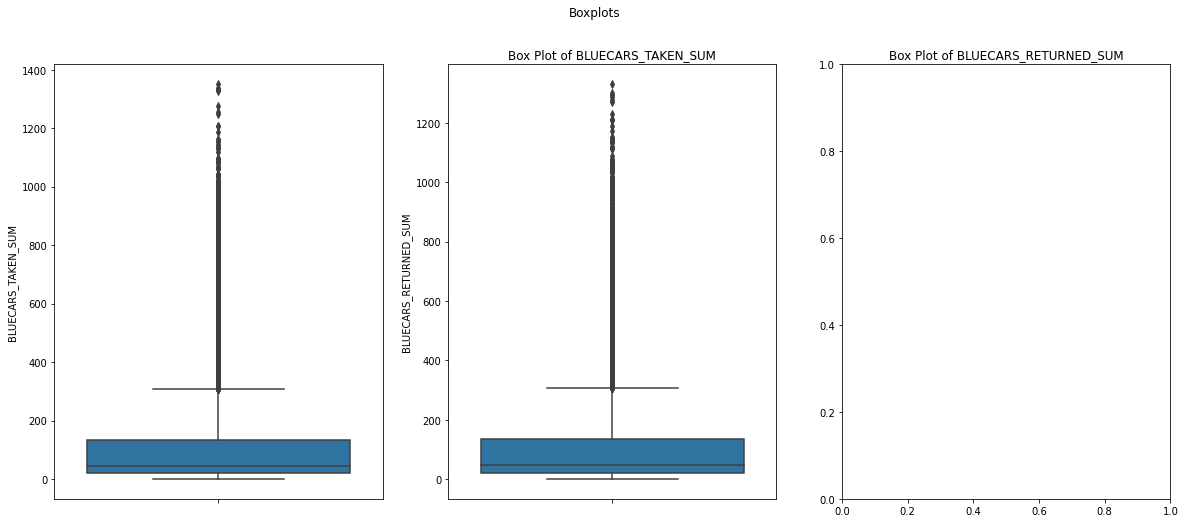

In [ ]:
#Checking for outliers
import seaborn as sns

fig, ax = plt.subplots(1,3, figsize=(20,8))
fig.suptitle('Boxplots')
sns.boxplot(data=autolib, y = "BLUECARS_TAKEN_SUM", ax=ax[0])
ax[1].set_title('Box Plot of BLUECARS_TAKEN_SUM')
sns.boxplot(data=autolib, y = "BLUECARS_RETURNED_SUM", ax=ax[1])
ax[2].set_title('Box Plot of BLUECARS_RETURNED_SUM')

plt.show()

#The diagrams show us existence of substantial numbers of outliers in
#N_daily_data_points, bluecars_taken_sum, bluecars_returned_sum

Using zscore to detect outliers

In [ ]:
#detecting outliers in the column bluecars_returned_sum

z = np.abs(stats.zscore(autolib['BLUECARS_RETURNED_SUM']))
z
threshold = 3
print(np.where(z > 3))

#The following column numbers are considered to be outliers

(array([1572, 1579, 1586, 1593, 1625, 1712, 1728, 1729, 1735, 1742, 1749,
       1764, 1795, 1817, 1824, 1848, 1854, 1855, 1861, 1862, 1868, 1878,
       1884, 1891, 1898, 1899, 1905, 1919, 1937, 1938, 1951, 1952, 1965,
       1972, 2003, 2004, 2010, 2011, 2017, 2018, 2024, 2040, 2173, 2184,
       2185, 2186, 2188, 2189, 2190, 2191, 2192, 2193, 2194, 2195, 2196,
       2197, 2198, 2199, 2200, 2201, 2202, 2203, 2204, 2205, 2206, 2207,
       2208, 2209, 2210, 2211, 2212, 2213, 2214, 2215, 2216, 2217, 2218,
       2219, 2220, 2222, 2223, 2224, 2225, 2226, 2227, 2228, 2229, 2230,
       2231, 2232, 2233, 2234, 2235, 2236, 2237, 2239, 2240, 2241, 2242,
       2243, 2244, 2245, 2246, 2247, 2248, 2249, 2250, 2251, 2252, 2253,
       2254, 2255, 2256, 2257, 2258, 2259, 2260, 2261, 2262, 2263, 2264,
       2265, 2266, 2267, 2268, 2269, 2270, 2271, 2272, 2273, 2274, 2275,
       2276, 2277, 2278, 2279, 2280, 2281, 2282, 2283, 2284, 2285, 2286,
       2287, 2288, 2289, 2290, 2291, 2292, 2293, 2

In [ ]:
#Repeating the same to detect outliers in the column bluecars_taken_sum

z = np.abs(stats.zscore(autolib['BLUECARS_TAKEN_SUM']))
print(z)
threshold = 3
print(np.where(z > 3))

#The following column numbers are considered to be outliers

[0.08589624 0.15061389 0.06511162 ... 0.50116785 0.61981688 0.66835512]
(array([1565, 1572, 1579, 1593, 1625, 1639, 1712, 1728, 1735, 1742, 1749,
       1764, 1795, 1817, 1824, 1848, 1854, 1861, 1862, 1868, 1884, 1891,
       1898, 1899, 1905, 1937, 1938, 1951, 1952, 1965, 1972, 2003, 2004,
       2010, 2011, 2017, 2018, 2024, 2061, 2159, 2173, 2184, 2185, 2186,
       2188, 2189, 2190, 2191, 2192, 2193, 2194, 2195, 2196, 2197, 2198,
       2199, 2200, 2201, 2202, 2203, 2204, 2205, 2206, 2207, 2208, 2209,
       2210, 2211, 2212, 2213, 2214, 2215, 2216, 2217, 2218, 2219, 2220,
       2222, 2223, 2224, 2225, 2226, 2227, 2228, 2229, 2230, 2231, 2232,
       2234, 2235, 2236, 2237, 2239, 2240, 2241, 2242, 2243, 2244, 2245,
       2246, 2247, 2248, 2249, 2250, 2251, 2252, 2253, 2254, 2255, 2256,
       2257, 2258, 2259, 2260, 2261, 2262, 2263, 2264, 2265, 2266, 2267,
       2268, 2269, 2270, 2271, 2272, 2273, 2274, 2275, 2276, 2277, 2278,
       2279, 2280, 2281, 2282, 2283, 2284, 2285, 22

Dealing with the outliers: Correcting, removing (using zscore)


In [ ]:
autolib1 = autolib.drop(['POSTAL_CODE', 'DATE', 'DAYOFWEEK', 'DAY_TYPE', 'UTILIB_TAKEN_SUM', 'UTILIB_RETURNED_SUM', 'UTILIB_14_TAKEN_SUM', 'UTILIB_14_RETURNED_SUM', 'SLOTS_FREED_SUM', 'SLOTS_TAKEN_SUM' ], axis=1)
autolib1

,N_DAILY_DATA_POINTS,BLUECARS_TAKEN_SUM,BLUECARS_RETURNED_SUM
0,1440,110,103
1,1438,98,94
2,1439,138,139
3,1320,104,104
4,1440,114,117
...,...,...,...
16080,1440,15,10
16081,1440,19,19
16082,1440,33,35
16083,1440,11,14


In [ ]:
z = np.abs(stats.zscore(autolib1))
z
threshold = 3
print(np.where(z > 3))

(array([    3,    93,   105, ..., 16022, 16034, 16057]), array([0, 0, 0, ..., 0, 0, 0]))


In [ ]:
autolib2 = autolib1[(z < 3).all(axis=1)]

In [ ]:
autolib1.shape

(16085, 3)

In [ ]:
autolib2.shape

#The size of the dataset has reduced indicating that the outliers have been deleted

(15190, 3)

Checking for anomalies and missing data


In [ ]:
#Find out if there are missing values.
autolib.isnull().sum()

POSTAL_CODE               0
DATE                      0
N_DAILY_DATA_POINTS       0
DAYOFWEEK                 0
DAY_TYPE                  0
BLUECARS_TAKEN_SUM        0
BLUECARS_RETURNED_SUM     0
UTILIB_TAKEN_SUM          0
UTILIB_RETURNED_SUM       0
UTILIB_14_TAKEN_SUM       0
UTILIB_14_RETURNED_SUM    0
SLOTS_FREED_SUM           0
SLOTS_TAKEN_SUM           0
dtype: int64

In [ ]:
autolib2.isnull().sum()

N_DAILY_DATA_POINTS      0
BLUECARS_TAKEN_SUM       0
BLUECARS_RETURNED_SUM    0
dtype: int64

There seems to be no missing data or values in the autolib dataset

Finding Range, Quantiles and Quantile ranges


In [ ]:
#Find the range between the maximum and minimum value 

maximum_value = autolib2.BLUECARS_TAKEN_SUM.max()
minimum_value = autolib2.BLUECARS_TAKEN_SUM.min()
range = maximum_value - minimum_value

print('range of taken bluecars', range)

maximum_value = autolib2.BLUECARS_RETURNED_SUM.max()
minimum_value = autolib2.BLUECARS_RETURNED_SUM.min()
range1 = maximum_value - minimum_value

print('range of returned bluecars', range1)

range of taken bluecars 682
range of returned bluecars 682


In [ ]:
#Finding the quartiles of the bluecars_taken_sum column

autolib2.BLUECARS_TAKEN_SUM.quantile([0.25, 0.5, 0.75])

0.25     19.0
0.50     44.0
0.75    117.0
Name: BLUECARS_TAKEN_SUM, dtype: float64

In [ ]:
#Finding the quartiles of the bluecars_returned_sum column

autolib2.BLUECARS_RETURNED_SUM.quantile([0.25, 0.5, 0.75])

0.25     19.0
0.50     44.0
0.75    118.0
Name: BLUECARS_RETURNED_SUM, dtype: float64

Descriptive analysis of the blue cars

Measures of central tendency

mean, mode and median

In [ ]:
#Finding the mode
#Finding the mean
#Finding the median

print('mean =', autolib2.BLUECARS_RETURNED_SUM.mean())
print('median =', autolib2.BLUECARS_RETURNED_SUM.median())
print('mode =', autolib2.BLUECARS_RETURNED_SUM.mode())


mean = 104.16458196181698
median = 44.0
mode = 0    13
dtype: int64


In [ ]:
#Finding the mode
#Finding the mean
#Finding the median

print('mode =', autolib2.BLUECARS_TAKEN_SUM.mode())
print('mean =', autolib2.BLUECARS_TAKEN_SUM.mean())
print('median =', autolib2.BLUECARS_TAKEN_SUM.median())

mode = 0    12
dtype: int64
mean = 104.16280447662936
median = 44.0


Measures of dispersion

Variance, kurtosis, skewness and standard deviation

In [ ]:

print("Variance: ",autolib2.BLUECARS_TAKEN_SUM.var())
print("Kurtosis: ",autolib2.BLUECARS_TAKEN_SUM.kurt())
print("Skewness: ",autolib2.BLUECARS_TAKEN_SUM.skew())
print("Std Dev: ",autolib.BLUECARS_TAKEN_SUM.std())

Variance:  19221.439883107767
Kurtosis:  3.1926939712895996
Skewness:  1.9708474700939793
Std Dev:  185.42657876727893


In [ ]:
print("Variance: ",autolib2.BLUECARS_RETURNED_SUM.var())
print("Kurtosis: ",autolib2.BLUECARS_RETURNED_SUM.kurt())
print("Skewness: ",autolib2.BLUECARS_RETURNED_SUM.skew())
print("Std Dev: ",autolib.BLUECARS_RETURNED_SUM.std())


Variance:  19243.157189090776
Kurtosis:  3.251208595723861
Skewness:  1.9818702288633276
Std Dev:  185.50153480148427


A kurtosis of 3 means the distribution produces fewer and less extreme outliers than does the normal distribution.
Distributions with kurtosis greater than 3 are said to be leptokurtic.

BIVARIATE ANALYSIS

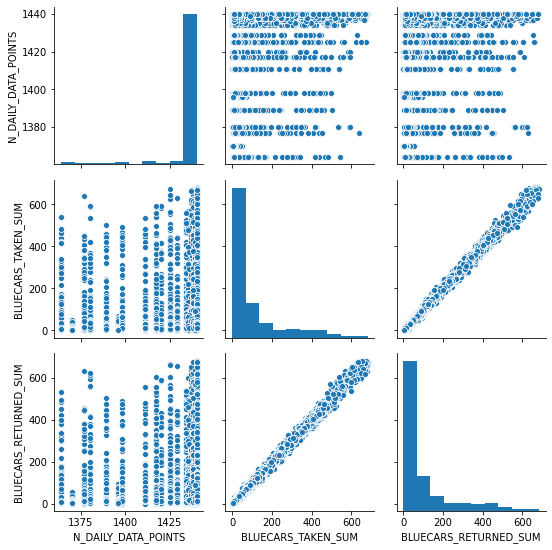

In [ ]:
# Ploting the bivariate summaries and recording our observations

sns.pairplot(autolib2)
plt.show()

#The pairplot below shows us that there is a positive correlation/relationship between blue cars taken and bluecars returned


Drawing a heatmap for the dataset

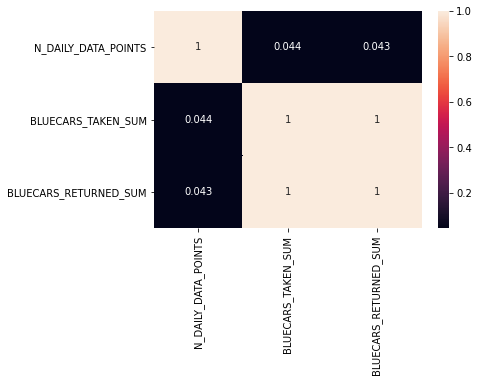

In [ ]:
# Plotting the Pearson correlation coefficient among numeric variables
#There is close correlation between bluecars taken and bluecars returned
#This is so because of the colour associated with the values close to 
#or equal to 1

sns.heatmap(autolib2.corr(),annot=True)
plt.show()

HYPOTHESIS TESTING

Defining the hypothesis

A sample of 1500 from two different postal codes (different areas) were picked for thw purpose of hypothesis testing. Postal codes that were picked are 92150 and 92380.
null hypothesis: The number of blue cars taken in area with postal code 75001 is different from the number of bluecars taken in area with postal code 75010
m0 /= m1

confidence level to be used in the sample population is 95%


alternate hypothesis: The number of blue cars taken in area with postal code 92150 is similar to the number of bluecars taken in area with postal code 92380.
m0 = m1

where m=number of blue cars taken

SAMPLING

Simple random sampling will be used in the sampling process. The data will be sampled randomly so as to eliminate any bias in the selection process.
The advantages are that your sample represents the target population and eliminates sampling bias.

In [ ]:
#Select a sample from the autolib dataset. (Technique : Simple Random Sampling)
autolib3 = autolib.sample(n=1500,replace='False')
print(autolib3)

       POSTAL_CODE       DATE  ...  SLOTS_FREED_SUM  SLOTS_TAKEN_SUM
14216        94220 2020-09-04  ...                0                0
5395         92150 2020-09-04  ...                4                5
10480        93150 2020-09-04  ...                0                0
15586        94800 2020-09-04  ...                0                0
7522         92310 2020-09-04  ...                0                0
...            ...        ...  ...              ...              ...
6789         92250 2020-09-04  ...                2                2
6267         92220 2020-09-04  ...                2                1
5733         92170 2020-09-04  ...                0                0
6191         92210 2020-09-04  ...                3                3
8789         92390 2020-09-04  ...                0                0

[1500 rows x 13 columns]


In [ ]:
#Standard deviation of the sample

autolib3.BLUECARS_TAKEN_SUM.std()

189.6323158803656

In [ ]:
#Standard deviation of the sample

autolib3.BLUECARS_TAKEN_SUM.mean()

129.372

In [ ]:
#Determining te number of
Post = autolib[(autolib.POSTAL_CODE == 92150) & (autolib.DAY_TYPE == 'weekday')]
Post


,POSTAL_CODE,DATE,N_DAILY_DATA_POINTS,DAYOFWEEK,DAY_TYPE,BLUECARS_TAKEN_SUM,BLUECARS_RETURNED_SUM,UTILIB_TAKEN_SUM,UTILIB_RETURNED_SUM,UTILIB_14_TAKEN_SUM,UTILIB_14_RETURNED_SUM,SLOTS_FREED_SUM,SLOTS_TAKEN_SUM
5301,92150,2020-09-04,1440,0,weekday,104,122,2,2,19,21,0,0
5302,92150,2020-09-04,1438,1,weekday,118,121,2,4,10,5,2,2
5303,92150,2020-09-04,1439,2,weekday,171,153,5,7,6,8,3,3
5304,92150,2020-09-04,1320,3,weekday,146,154,6,3,10,7,1,1
5305,92150,2020-09-04,1440,4,weekday,164,176,3,6,12,15,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5450,92150,2020-09-04,1440,2,weekday,176,180,6,6,11,12,7,7
5451,92150,2020-09-04,1439,3,weekday,175,165,5,7,12,9,3,3
5452,92150,2020-09-04,1440,4,weekday,204,208,7,4,8,10,4,5
5455,92150,2020-09-04,1440,0,weekday,162,162,2,2,8,12,3,3


In [ ]:
Post1 = autolib[(autolib.POSTAL_CODE == 92380) & (autolib.DAY_TYPE == 'weekday')]
Post1

,POSTAL_CODE,DATE,N_DAILY_DATA_POINTS,DAYOFWEEK,DAY_TYPE,BLUECARS_TAKEN_SUM,BLUECARS_RETURNED_SUM,UTILIB_TAKEN_SUM,UTILIB_RETURNED_SUM,UTILIB_14_TAKEN_SUM,UTILIB_14_RETURNED_SUM,SLOTS_FREED_SUM,SLOTS_TAKEN_SUM
8565,92380,2020-09-04,1440,0,weekday,24,18,0,0,5,5,0,0
8566,92380,2020-09-04,1438,1,weekday,9,14,0,0,2,3,0,0
8567,92380,2020-09-04,1439,2,weekday,26,24,2,2,5,5,0,0
8568,92380,2020-09-04,1320,3,weekday,17,17,0,0,2,2,0,0
8569,92380,2020-09-04,1440,4,weekday,19,24,1,2,3,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8714,92380,2020-09-04,1440,2,weekday,15,24,0,0,1,2,0,0
8715,92380,2020-09-04,1439,3,weekday,29,28,1,1,2,1,0,0
8716,92380,2020-09-04,1440,4,weekday,28,30,1,1,0,0,0,0
8719,92380,2020-09-04,1440,0,weekday,15,22,0,1,0,2,0,0


The sample size that was used in this analysis was 1500 

From the above analysis, the mean of the sampled population is 129.376

The standard deviation of the sampled population is 189.63


```
# This is formatted as code
```

